In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
football = pd.read_csv("data/deflategate.csv")
football.head()

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45


In [3]:
patriots_starts = 12.5 * np.ones(11)
colts_starts = 13 * np.ones(4)
start_vals = np.append(patriots_starts, colts_starts)
start_vals

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [4]:
football["Pressure Drop"] = start_vals - (football["Blakeman"] + football["Prioleau"])/2
football.head()

,Team,Blakeman,Prioleau,Pressure Drop
0,Patriots,11.50,11.80,0.850
1,Patriots,10.85,11.20,1.475
2,Patriots,11.15,11.50,1.175
3,Patriots,10.70,11.00,1.650
4,Patriots,11.10,11.45,1.225


In [5]:
grouped = football.groupby("Team")
grouped["Pressure Drop"].mean()

Team
Colts       0.468750
Patriots    1.202273
Name: Pressure Drop, dtype: float64

In [6]:
football.drop(["Blakeman", "Prioleau"], axis=1, inplace=True)
football

,Team,Pressure Drop
0,Patriots,0.850
1,Patriots,1.475
2,Patriots,1.175
3,Patriots,1.650
4,Patriots,1.225
5,Patriots,0.725
6,Patriots,0.425
7,Patriots,1.175
8,Patriots,1.350
9,Patriots,1.800


In [7]:
observed_difference = grouped["Pressure Drop"].mean()[1] - grouped["Pressure Drop"].mean()[0]
observed_difference

0.733522727272728

In [8]:
differences = []
simulations = 5000
for i in range(simulations):
    shuffled = football.sample(15, replace=False)
    shuffled_teams = shuffled["Team"]
    original_and_shuffled = football.assign(Shuffled_Teams=shuffled_teams.values)
    mean_ = original_and_shuffled.groupby("Shuffled_Teams")
    difference = mean_["Pressure Drop"].mean()[1] - mean_["Pressure Drop"].mean()[0]
    differences.append(difference)

In [9]:
differences

[-0.16136363636363615,
 -0.0931818181818177,
 0.26477272727272805,
 -0.15284090909090942,
 0.11136363636363611,
 -0.16136363636363682,
 -0.1357954545454546,
 0.060227272727273684,
 0.14545454545454461,
 -0.26363636363636433,
 0.2136363636363643,
 0.03465909090909136,
 -0.5619318181818183,
 0.017613636363636553,
 0.4693181818181813,
 0.2818181818181815,
 0.17102272727272738,
 0.17102272727272738,
 -0.17840909090909096,
 0.40965909090909136,
 -0.1102272727272724,
 -0.15284090909090942,
 -0.04204545454545505,
 0.0943181818181813,
 -0.016477272727272396,
 -0.4596590909090913,
 -0.3318181818181817,
 0.13693181818181843,
 0.19659090909090948,
 0.2306818181818191,
 -0.10170454545454566,
 0.10284090909090882,
 0.2732954545454549,
 -0.45965909090909074,
 -0.26363636363636367,
 0.10284090909090882,
 -0.2977272727272733,
 0.3414772727272728,
 -0.11875000000000047,
 -0.3744318181818186,
 -0.0420454545454545,
 -0.07613636363636345,
 0.4693181818181813,
 -0.36590909090909063,
 0.14545454545454573,
 

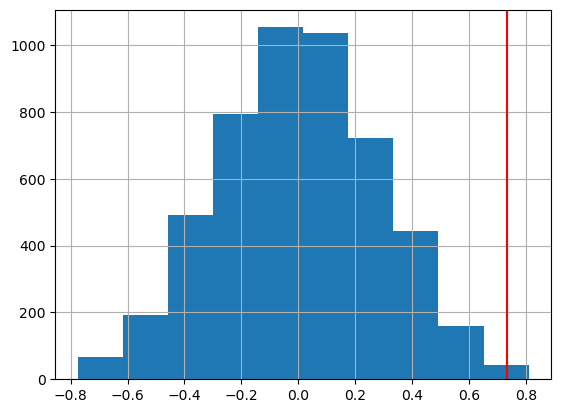

In [10]:
plt.hist(differences)
plt.grid(True)
plt.axvline(observed_difference, 0, color="red")
plt.show()

In [10]:
football.hist()